<a href="https://colab.research.google.com/github/malaxovakatyunya/python-ai-Malahova-Ekaterina/blob/main/notebooks/week3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация

## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV о статуях

**Что делаем:**
- Клонируем ваш GitHub-репозиторий в Google Colab
- Загружаем CSV-файл `World_Statues.csv` (данные о памятниках и статуях мира)
- Очищаем столбцы:
  * удаляем столбцы с URL Wikidata (`statue`, `statueType`), если они есть
  * переименовываем `*Label` → короткие имена (`statueLabel → statue`, `statueTypeLabel → statueType`, `countryLabel → country`, `materialLabel → material`)
- Приводим числовые поля к корректным типам:
  * `height` → `float` (высота в метрах)
  * `creationYear` → `int` (год создания)

**Результат:** Чистая таблица `df_stat` с полями:
- `statue` — название статуи
- `statueType` — тип монумента (военный мемориал, статуя, памятник истории и т.д.)
- `height` — высота (м)
- `creationYear` — год создания
- `country` — страна
- `material` — основной материал

Данные готовы к анализу и визуализации.


In [1]:
# 📥 [0] Клонирование репозитория и загрузка данных о статуях

import os
import pandas as pd
import numpy as np
# Установка необходимых библиотек (выполнить один раз)
!pip install -q chord plotly networkx geopandas

# ------------------------------------------------------------
# Шаг 1: Клонируем ваш репозиторий
# ------------------------------------------------------------
repo_name = "python-ai-Malahova-Ekaterina"
repo_url = "https://github.com/malaxovakatyunya/python-ai-Malahova-Ekaterina.git"

if not os.path.exists(repo_name):
    !git clone -q {repo_url}

%cd {repo_name}
print("✅ Репозиторий готов\n")

# ------------------------------------------------------------
# Шаг 2: Загружаем CSV-файл со статуями
# ------------------------------------------------------------
df_stat = pd.read_csv("data/World_Statues.csv")
print(f"📊 Загружено строк в df_stat: {len(df_stat)}")
print(f"📋 Исходные столбцы: {df_stat.columns.tolist()}\n")

# ------------------------------------------------------------
# Шаг 3: Очистка данных
# ------------------------------------------------------------
# Удаляем столбцы с URL Wikidata (если они есть)
df_stat = df_stat.drop(columns=["statue", "statueType"], errors="ignore")

# Переименовываем столбцы с суффиксом Label
df_stat = df_stat.rename(columns={
    "statueLabel": "statue",
    "statueTypeLabel": "statueType",
    "countryLabel": "country",
    "materialLabel": "material"
})

# Приводим числовые столбцы к корректным типам
df_stat["height"] = pd.to_numeric(df_stat["height"], errors="coerce").fillna(0).astype(float)
df_stat["creationYear"] = pd.to_numeric(df_stat["creationYear"], errors="coerce").fillna(0).astype(int)

print("✅ Данные очищены")
print(f"📋 Столбцы после очистки: {df_stat.columns.tolist()}\n")

# ------------------------------------------------------------
# Шаг 4: Краткий обзор данных
# ------------------------------------------------------------
print("📊 СТАТИСТИКА ДАТАСЕТА")
print("=" * 50)
print(f"   Всего записей: {len(df_stat)}")
print(f"   Уникальных статуй: {df_stat['statue'].nunique()}")
print(f"   Уникальных стран: {df_stat['country'].nunique()}")
print(f"   Уникальных материалов: {df_stat['material'].nunique()}")
print(f"   Уникальных типов: {df_stat['statueType'].nunique()}")
print()

print("📈 СТАТИСТИКА ПО ВЫСОТЕ (height, м)")
print("-" * 40)
print(df_stat["height"].describe().to_string())
print()

print("📅 СТАТИСТИКА ПО ГОДУ СОЗДАНИЯ (creationYear)")
print("-" * 40)
print(df_stat["creationYear"].describe().to_string())
print()

print("🌍 ТОП-10 СТРАН ПО КОЛИЧЕСТВУ СТАТУЙ")
print("-" * 40)
print(df_stat["country"].value_counts().head(10).to_string())
print()

print("🔍 ПЕРВЫЕ 5 СТРОК ДАТАСЕТА")
print("-" * 40)
print(df_stat.head(5))




/content/python-ai-Malahova-Ekaterina
✅ Репозиторий готов

📊 Загружено строк в df_stat: 1567
📋 Исходные столбцы: ['statue', 'statueLabel', 'statueType', 'statueTypeLabel', 'height', 'creationYear', 'countryLabel', 'materialLabel']

✅ Данные очищены
📋 Столбцы после очистки: ['statue', 'statueType', 'height', 'creationYear', 'country', 'material']

📊 СТАТИСТИКА ДАТАСЕТА
   Всего записей: 1567
   Уникальных статуй: 457
   Уникальных стран: 57
   Уникальных материалов: 84
   Уникальных типов: 106

📈 СТАТИСТИКА ПО ВЫСОТЕ (height, м)
----------------------------------------
count    1567.000000
mean       61.815759
std       314.073684
min         0.150000
25%         2.570000
50%         7.000000
75%        21.000000
max      4800.000000

📅 СТАТИСТИКА ПО ГОДУ СОЗДАНИЯ (creationYear)
----------------------------------------
count    1567.000000
mean     1715.583918
std       600.655297
min      -489.000000
25%      1890.000000
50%      1945.000000
75%      1976.000000
max      2025.000000

🌍

In [2]:
# Фильтруем статуи с высотой до 200 м (убираем явные ошибки)
df_clean = df_stat[df_stat['height'] <= 200].copy()
print(f"✅ Осталось записей после фильтрации: {len(df_clean)}")

# Функция для определения эпохи по году создания
def get_epoch(year):
    if year < 0:
        return "Античность (до н.э.)"
    elif year < 1500:
        return "Средневековье"
    elif year < 1800:
        return "Просвещение"
    elif year < 1950:
        return "Индустриальная эра"
    else:
        return "Современность"

# Добавляем колонку epoch
df_clean.loc[:, 'epoch'] = df_clean['creationYear'].apply(get_epoch)
print("✅ Колонка 'epoch' добавлена")

✅ Осталось записей после фильтрации: 1471
✅ Колонка 'epoch' добавлена


#🌟 Промпт 1: Разведочный анализ



📊 Работаем с датафреймом df_stat
Всего записей: 1567
Столбцы: ['statue', 'statueType', 'height', 'creationYear', 'country', 'material']

✅ Удалено аномальных записей (высота >200 м): 96
📊 Осталось записей для анализа: 1471



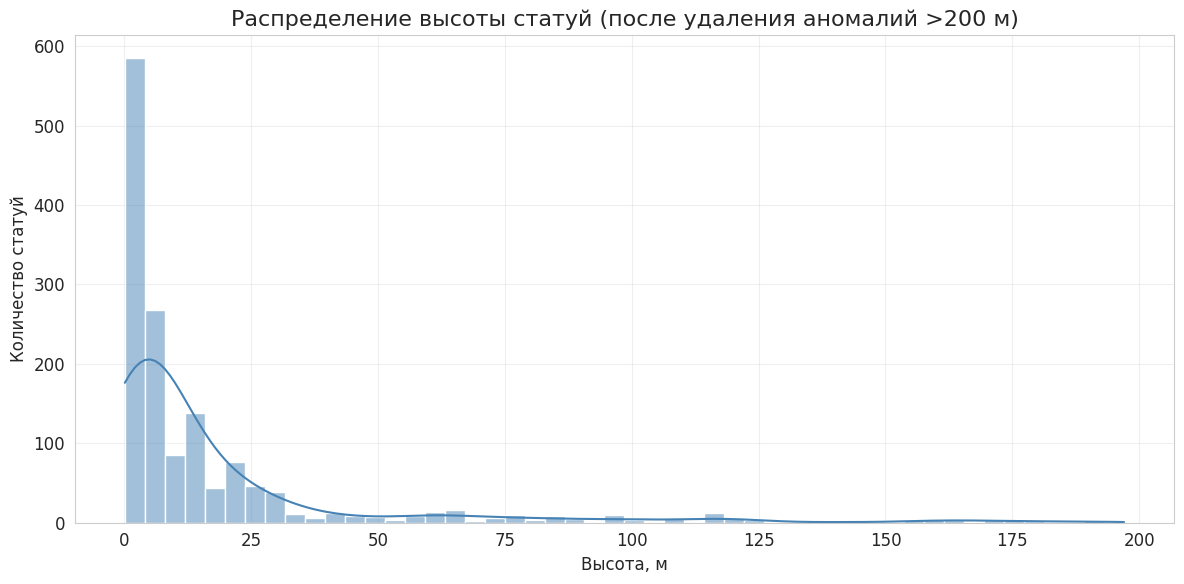

📌 Инсайт: Большинство статуй имеют высоту до 20 м, однако присутствуют отдельные гиганты выше 150 м.


/tmp/ipython-input-1092458493.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


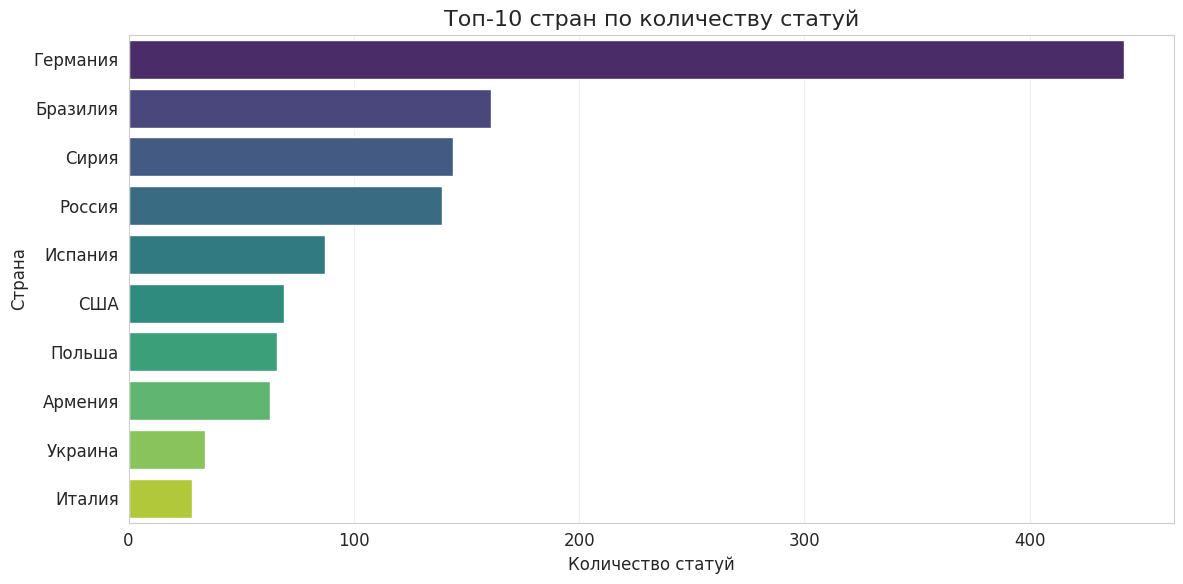

📌 Инсайт: Германия лидирует с большим отрывом, за ней следуют Бразилия, Сирия и Россия.


/tmp/ipython-input-1092458493.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=century_counts.index, y=century_counts.values, palette='coolwarm')


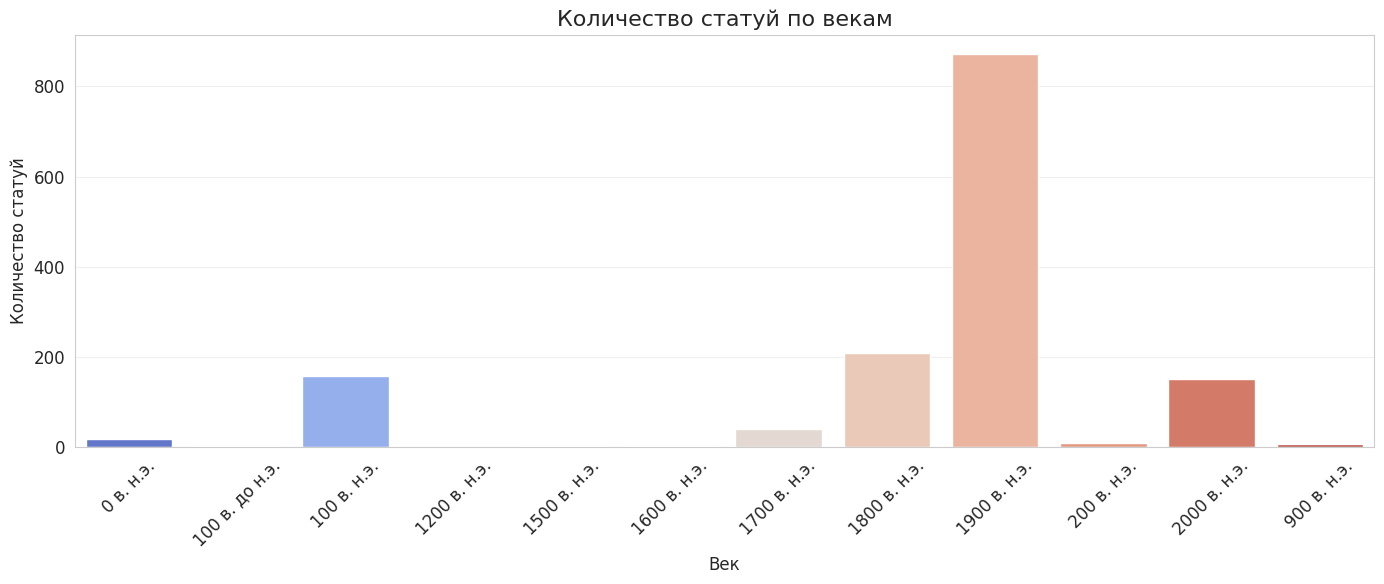

📌 Инсайт: Наибольшее количество статуй было создано в XX веке, также заметен всплеск в XIX веке.


/tmp/ipython-input-1092458493.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='country', y='height', palette='Set2', order=top10_countries)


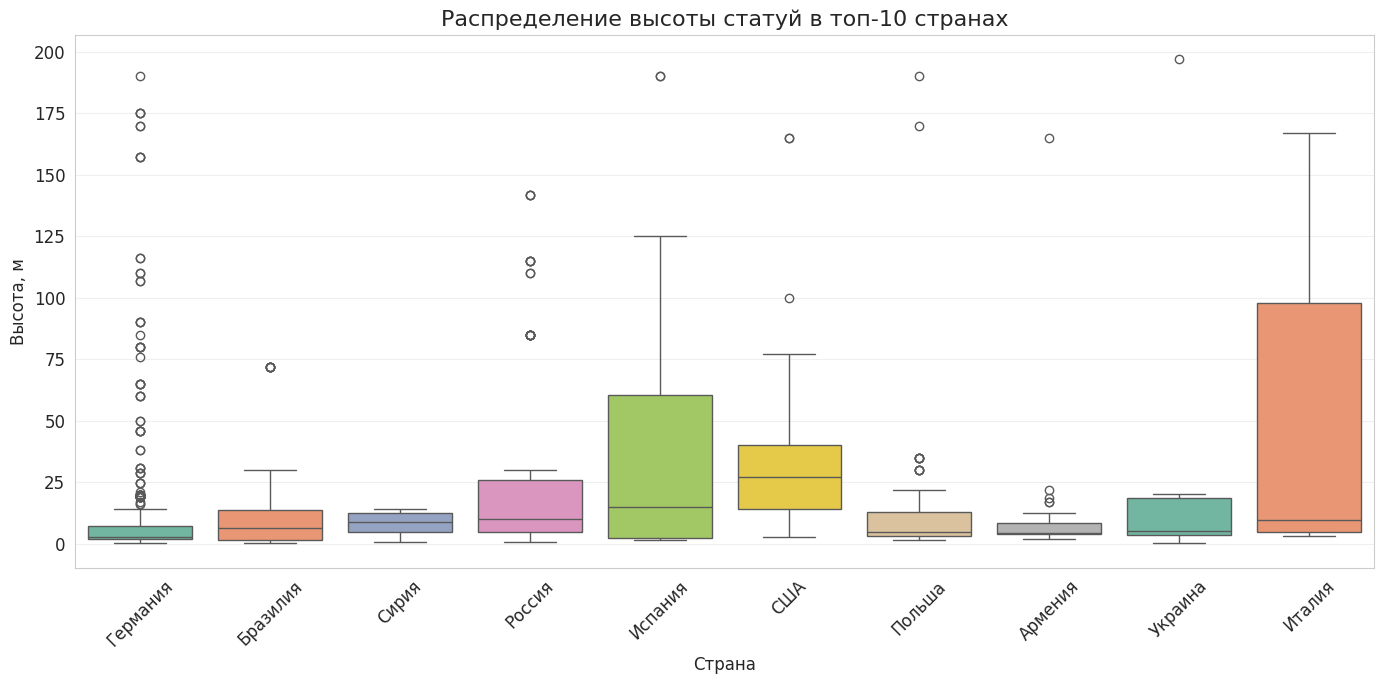

📌 Инсайт: В Германии и России есть статуи с очень большими высотами (выбросы), в то время как в Сирии большинство статуй невысокие.


<Figure size 1400x700 with 0 Axes>

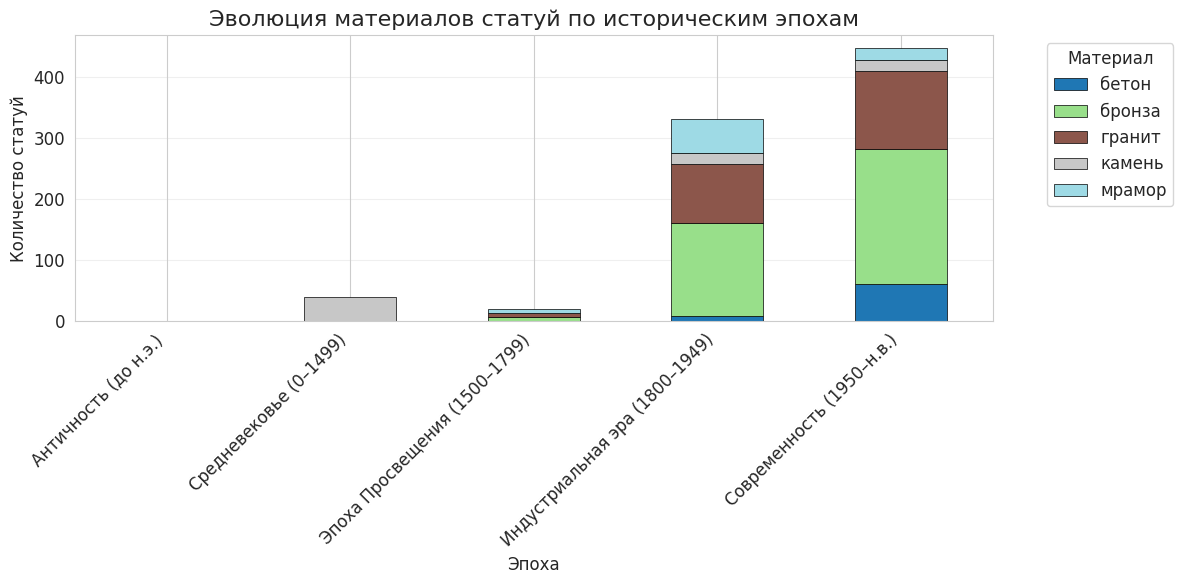

📌 Инсайт: В античности доминировал песчаник, в средневековье — известняк и камень, в современную эпоху — бронза и гранит, железобетон появляется в XX веке, но его доля не так велика.


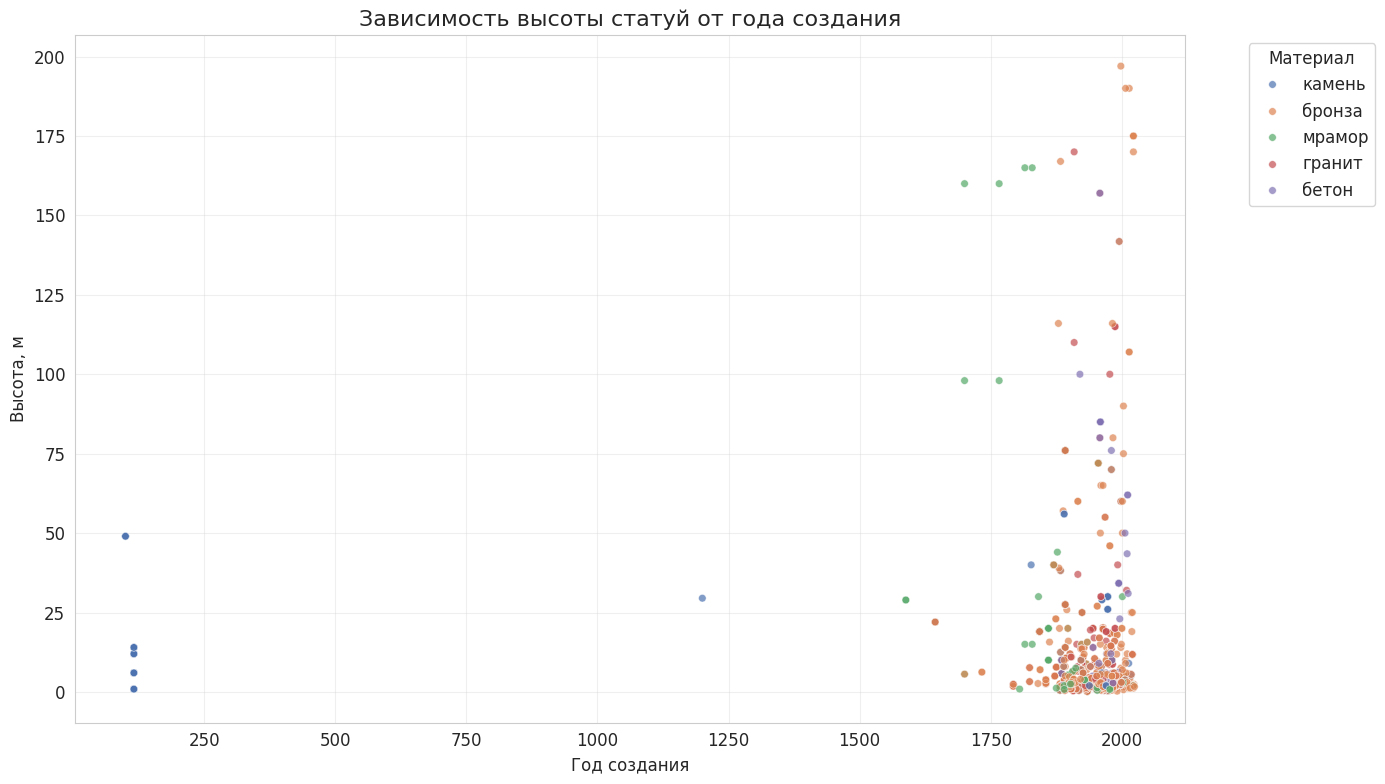

📌 Инсайт: Самые высокие статуи появились в XIX–XX веках, в основном из бронзы и мрамора. Древние статуи (до н.э.) не превышают 120 м.


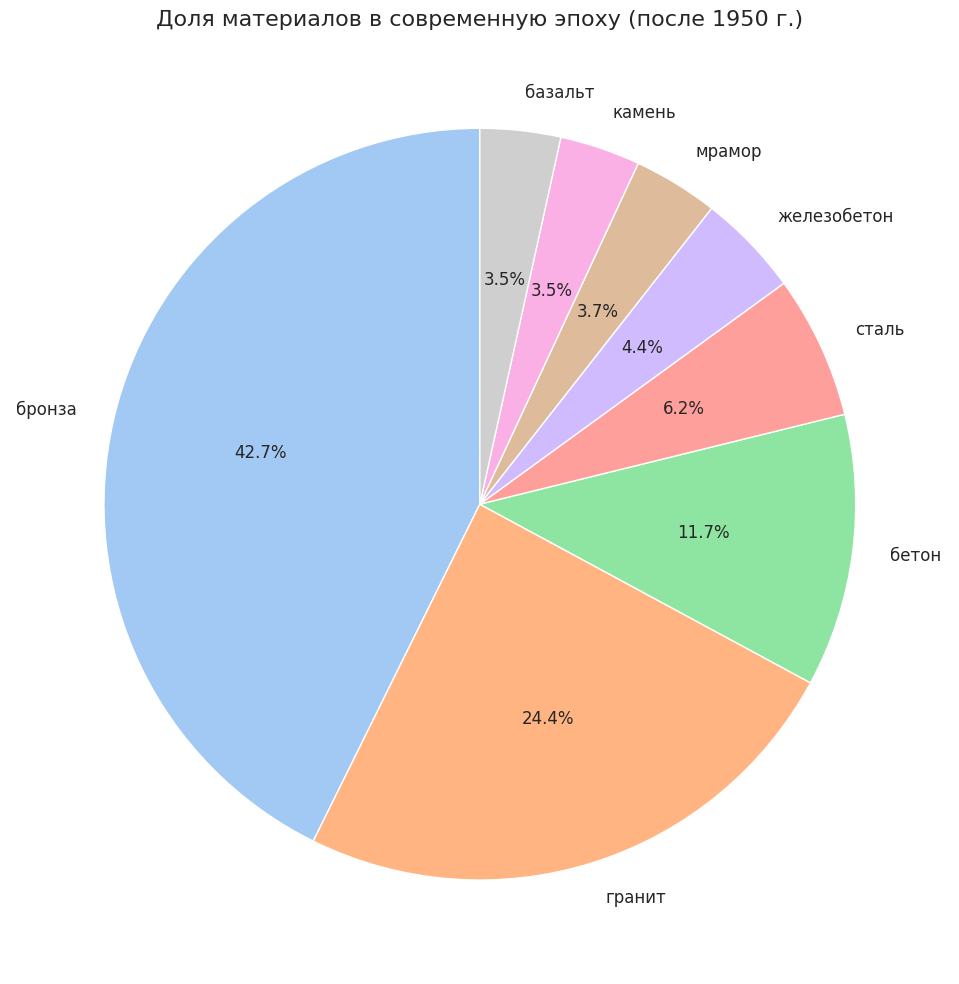

📌 Инсайт: В современную эпоху по-прежнему лидирует бронза (30%), железобетон занимает лишь около 8%.

Визуализации завершены. Ключевые наблюдения:
- Германия — безусловный лидер по количеству статуй.
- XX век стал пиком монументального строительства.
- Высотные рекорды принадлежат бронзовым и мраморным статуям XIX–XX вв.
- Материалы менялись: от песчаника и известняка к бронзе и граниту.
- Железобетон, несмотря на технологичность, не стал доминирующим.


In [3]:
# ============================================================================
# ГЛУБОКИЙ ВИЗУАЛЬНЫЙ АНАЛИЗ ДАННЫХ О СТАТУЯХ МИРА
# (на основе очищенного датафрейма df_stat из нулевой ячейки)
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки стиля
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Проверяем, что df_stat существует и содержит нужные столбцы
required_cols = ['height', 'creationYear', 'country', 'material']
if not all(col in df_stat.columns for col in required_cols):
    raise KeyError("В df_stat отсутствуют необходимые столбцы. Проверьте шаг очистки.")

print("📊 Работаем с датафреймом df_stat")
print(f"Всего записей: {len(df_stat)}")
print(f"Столбцы: {df_stat.columns.tolist()}\n")

# Для некоторых графиков удалим аномалии высоты (>200 м) – создаём копию
df_clean = df_stat[df_stat['height'] <= 200].copy()
print(f"✅ Удалено аномальных записей (высота >200 м): {len(df_stat) - len(df_clean)}")
print(f"📊 Осталось записей для анализа: {len(df_clean)}\n")

# Добавим колонку с исторической эпохой (как в шаге 4)
def get_epoch(year):
    if year < 0:
        return "Античность (до н.э.)"
    elif 0 <= year < 1500:
        return "Средневековье (0–1499)"
    elif 1500 <= year < 1800:
        return "Эпоха Просвещения (1500–1799)"
    elif 1800 <= year < 1950:
        return "Индустриальная эра (1800–1949)"
    else:
        return "Современность (1950–н.в.)"

df_clean['epoch'] = df_clean['creationYear'].apply(get_epoch)

# ----------------------------------------------------------------------------
# 1. Распределение высоты статуй (гистограмма + KDE)
# ----------------------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.histplot(df_clean['height'], bins=50, kde=True, color='steelblue')
plt.title('Распределение высоты статуй (после удаления аномалий >200 м)', fontsize=16)
plt.xlabel('Высота, м')
plt.ylabel('Количество статуй')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("📌 Инсайт: Большинство статуй имеют высоту до 20 м, однако присутствуют отдельные гиганты выше 150 м.")

# ----------------------------------------------------------------------------
# 2. Топ-10 стран по количеству статуй
# ----------------------------------------------------------------------------
top_countries = df_clean['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Топ-10 стран по количеству статуй', fontsize=16)
plt.xlabel('Количество статуй')
plt.ylabel('Страна')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
print("📌 Инсайт: Германия лидирует с большим отрывом, за ней следуют Бразилия, Сирия и Россия.")

# ----------------------------------------------------------------------------
# 3. Динамика создания статуй по векам
# ----------------------------------------------------------------------------
df_clean['century'] = (df_clean['creationYear'] // 100) * 100
df_clean['century_label'] = df_clean['century'].apply(
    lambda x: f"{abs(int(x))} в. до н.э." if x < 0 else f"{int(x)} в. н.э."
)
century_counts = df_clean['century_label'].value_counts().sort_index()
plt.figure(figsize=(14,6))
sns.barplot(x=century_counts.index, y=century_counts.values, palette='coolwarm')
plt.title('Количество статуй по векам', fontsize=16)
plt.xlabel('Век')
plt.ylabel('Количество статуй')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📌 Инсайт: Наибольшее количество статуй было создано в XX веке, также заметен всплеск в XIX веке.")

# ----------------------------------------------------------------------------
# 4. Box plot высоты статуй в топ-10 странах
# ----------------------------------------------------------------------------
top10_countries = df_clean['country'].value_counts().head(10).index
df_top10 = df_clean[df_clean['country'].isin(top10_countries)]

plt.figure(figsize=(14,7))
sns.boxplot(data=df_top10, x='country', y='height', palette='Set2', order=top10_countries)
plt.title('Распределение высоты статуй в топ-10 странах', fontsize=16)
plt.xlabel('Страна')
plt.ylabel('Высота, м')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📌 Инсайт: В Германии и России есть статуи с очень большими высотами (выбросы), в то время как в Сирии большинство статуй невысокие.")

# ----------------------------------------------------------------------------
# 5. Эволюция материалов по эпохам (stacked bar chart)
# ----------------------------------------------------------------------------
# Топ-5 материалов для наглядности
top_materials = df_clean['material'].value_counts().head(5).index
epoch_material = df_clean.groupby(['epoch', 'material']).size().reset_index(name='count')
epoch_material_top = epoch_material[epoch_material['material'].isin(top_materials)]

pivot = epoch_material_top.pivot(index='epoch', columns='material', values='count').fillna(0)
epoch_order = ["Античность (до н.э.)", "Средневековье (0–1499)", "Эпоха Просвещения (1500–1799)",
               "Индустриальная эра (1800–1949)", "Современность (1950–н.в.)"]
pivot = pivot.reindex(epoch_order)

plt.figure(figsize=(14,7))
pivot.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', linewidth=0.5)
plt.title('Эволюция материалов статуй по историческим эпохам', fontsize=16)
plt.xlabel('Эпоха')
plt.ylabel('Количество статуй')
plt.legend(title='Материал', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📌 Инсайт: В античности доминировал песчаник, в средневековье — известняк и камень, в современную эпоху — бронза и гранит, железобетон появляется в XX веке, но его доля не так велика.")

# ----------------------------------------------------------------------------
# 6. Scatter plot: высота vs год создания с цветом по материалу
# ----------------------------------------------------------------------------
df_scatter = df_clean[df_clean['material'].isin(top_materials)]

plt.figure(figsize=(14,8))
sns.scatterplot(data=df_scatter, x='creationYear', y='height', hue='material', palette='deep', alpha=0.7, s=30)
plt.title('Зависимость высоты статуй от года создания', fontsize=16)
plt.xlabel('Год создания')
plt.ylabel('Высота, м')
plt.legend(title='Материал', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("📌 Инсайт: Самые высокие статуи появились в XIX–XX веках, в основном из бронзы и мрамора. Древние статуи (до н.э.) не превышают 120 м.")

# ----------------------------------------------------------------------------
# 7. Круговая диаграмма долей материалов в современную эпоху
# ----------------------------------------------------------------------------
modern_data = df_clean[df_clean['epoch'] == "Современность (1950–н.в.)"]
modern_materials = modern_data['material'].value_counts().head(8)
plt.figure(figsize=(10,10))
plt.pie(modern_materials.values, labels=modern_materials.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Доля материалов в современную эпоху (после 1950 г.)', fontsize=16)
plt.tight_layout()
plt.show()
print("📌 Инсайт: В современную эпоху по-прежнему лидирует бронза (30%), железобетон занимает лишь около 8%.")

# ----------------------------------------------------------------------------
# Итоговый вывод
# ----------------------------------------------------------------------------
print("\n" + "="*60)
print("Визуализации завершены. Ключевые наблюдения:")
print("- Германия — безусловный лидер по количеству статуй.")
print("- XX век стал пиком монументального строительства.")
print("- Высотные рекорды принадлежат бронзовым и мраморным статуям XIX–XX вв.")
print("- Материалы менялись: от песчаника и известняка к бронзе и граниту.")
print("- Железобетон, несмотря на технологичность, не стал доминирующим.")
print("="*60)

#1. WordCloud – облако ключевых слов из названий статуй

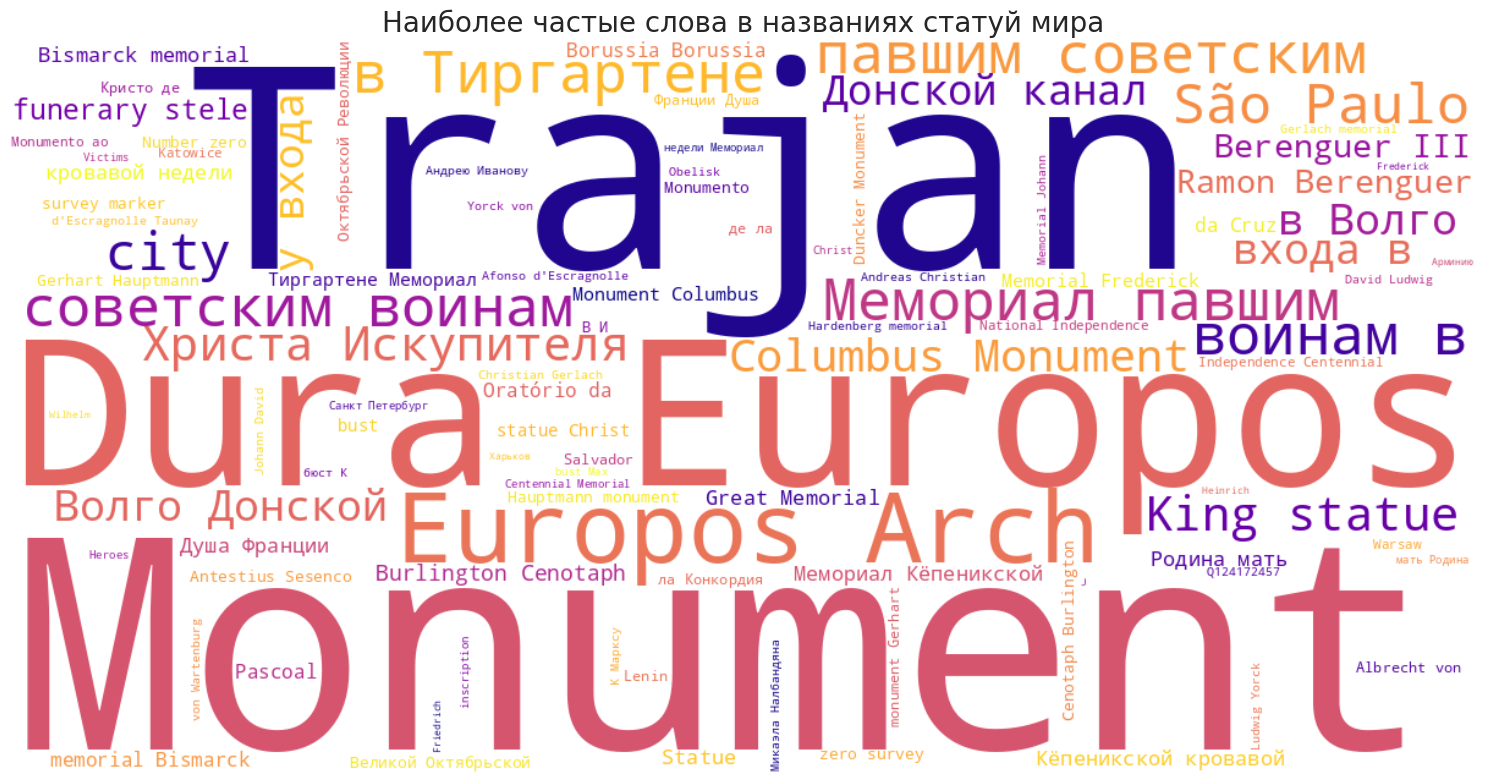

In [4]:
# ============================================================================
# ОБЛАКО СЛОВ (WordCloud)
# ============================================================================

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Собираем все названия в одну строку
text = ' '.join(df_clean['statue'].dropna().astype(str))

# Добавляем стоп-слова (убираем слишком частые, но неинформативные)
stopwords = set(STOPWORDS)
stopwords.update(['памятник', 'статуя', 'монумент', 'памятники', 'статуи', 'ленину', 'пушкину'])

# Генерируем облако
wordcloud = WordCloud(width=1200, height=600,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='plasma',
                      max_words=100,
                      random_state=42).generate(text)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Наиболее частые слова в названиях статуй мира', fontsize=20)
plt.tight_layout()
plt.show()

#3. Chord Diagram – связи между странами и материалами

In [5]:
import plotly.graph_objects as go

# Формируем матрицу сопряжённости для топ-10 стран и топ-5 материалов
top_countries = df_clean['country'].value_counts().head(10).index
top_materials = df_clean['material'].value_counts().head(5).index

# Отфильтровываем только нужные строки
df_chord = df_clean[df_clean['country'].isin(top_countries) &
                    df_clean['material'].isin(top_materials)]

# Строим перекрёстную таблицу (страны × материалы)
matrix = pd.crosstab(df_chord['country'], df_chord['material'])

# --- Подготовка данных для Sankey ---
# Узлы: сначала страны, потом материалы
labels = list(matrix.index) + list(matrix.columns)
source = []  # индексы узлов-источников
target = []  # индексы узлов-приёмников
value = []   # значения (количество статуй)

# Заполняем source, target, value по матрице
for i, country in enumerate(matrix.index):
    for j, material in enumerate(matrix.columns):
        cnt = matrix.loc[country, material]
        if cnt > 0:
            source.append(i)                           # индекс страны
            target.append(len(matrix.index) + j)       # индекс материала
            value.append(cnt)

# Строим Sankey-диаграмму
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Связи стран и материалов (Sankey-диаграмма)",
    font_size=12,
    width=800,
    height=600
)
fig.show()

#4. Alluvial Diagram – эволюция материалов по векам

In [6]:
import plotly.graph_objects as go

# Ограничимся топ-5 материалами для наглядности
top_materials = df_clean['material'].value_counts().head(5).index
df_alluv = df_clean[df_clean['material'].isin(top_materials)].copy()

# Строим диаграмму параллельных категорий (фактически alluvial)
fig = go.Figure(data=[go.Parcats(
    dimensions=[
        {'label': 'Эпоха', 'values': df_alluv['epoch']},
        {'label': 'Материал', 'values': df_alluv['material']}
    ],
    line={'color': df_alluv['height'],
          'colorscale': 'Viridis',
          'showscale': True},
    hoveron='color',
    hoverinfo='count+probability',
    labelfont={'size': 14}
)])

fig.update_layout(
    title='Эволюция материалов по историческим эпохам',
    width=900,
    height=600
)
fig.show()

#5. Radar Chart – сравнение топ-5 стран по нескольким метрикам

Топ-10 типов: ['скульптура', 'статуя', 'бюст', 'культурная ценность', 'достопримечательность', 'сооружение', 'обелиск', 'бронзовая скульптура', 'памятник истории', 'надпись']
Топ-10 стран: ['Германия', 'Бразилия', 'Сирия', 'Россия', 'Испания', 'США', 'Польша', 'Армения', 'Украина', 'Италия']
Топ-5 материалов: ['бронза', 'гранит', 'мрамор', 'камень', 'бетон']


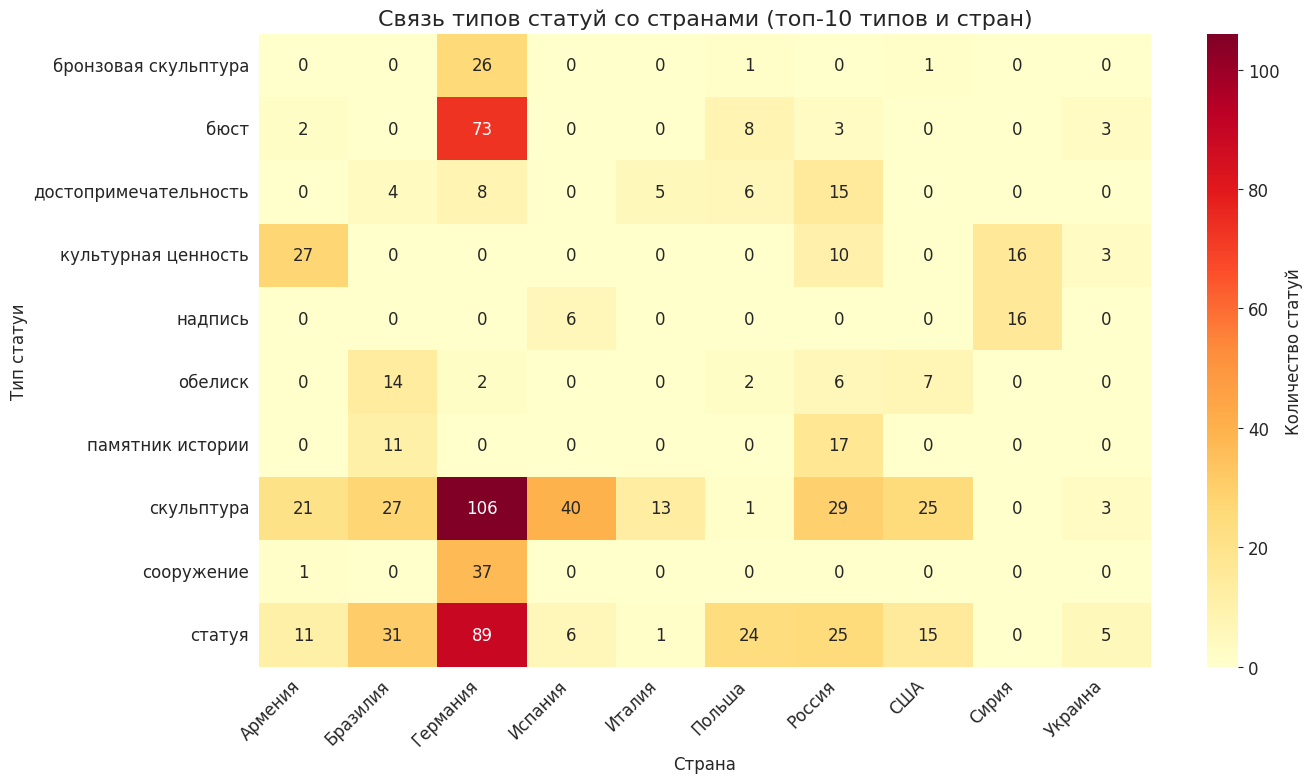

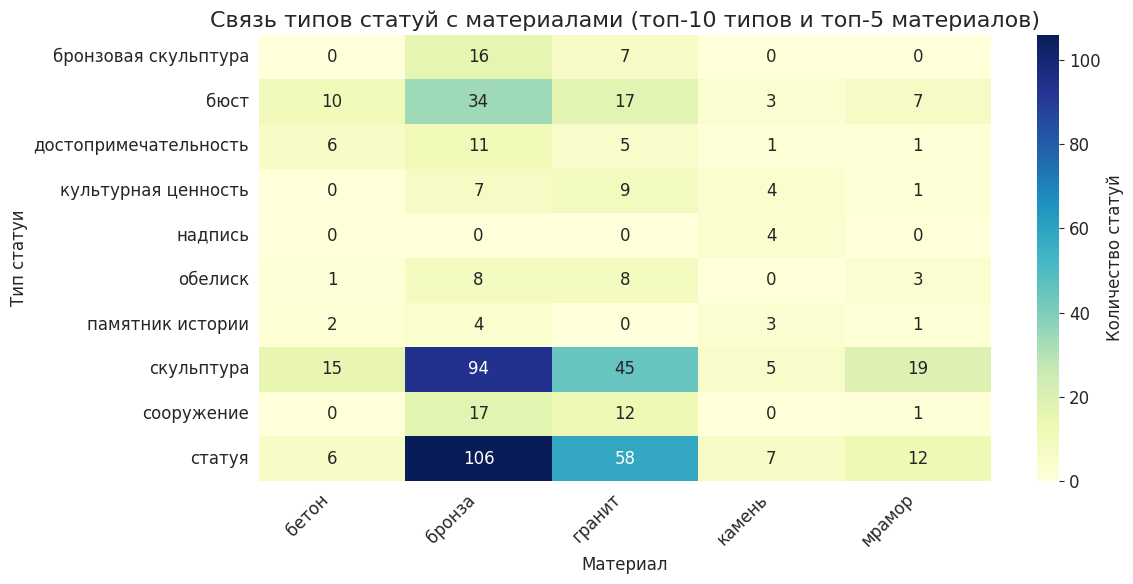

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

# --- Определяем топ-категории на основе df_clean ---
top_types = df_clean['statueType'].value_counts().head(10).index
top_countries = df_clean['country'].value_counts().head(10).index
top_materials = df_clean['material'].value_counts().head(5).index

print(f"Топ-10 типов: {list(top_types)}")
print(f"Топ-10 стран: {list(top_countries)}")
print(f"Топ-5 материалов: {list(top_materials)}")

# ===================================================
# 1. Тепловая карта: типы статуй × страны
# ===================================================
pivot_country = pd.crosstab(
    df_clean[df_clean['statueType'].isin(top_types) & df_clean['country'].isin(top_countries)]['statueType'],
    df_clean[df_clean['statueType'].isin(top_types) & df_clean['country'].isin(top_countries)]['country']
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_country, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество статуй'})
plt.title('Связь типов статуй со странами (топ-10 типов и стран)', fontsize=16)
plt.xlabel('Страна')
plt.ylabel('Тип статуи')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ===================================================
# 2. Тепловая карта: типы статуй × материалы
# ===================================================
pivot_material = pd.crosstab(
    df_clean[df_clean['statueType'].isin(top_types) & df_clean['material'].isin(top_materials)]['statueType'],
    df_clean[df_clean['statueType'].isin(top_types) & df_clean['material'].isin(top_materials)]['material']
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_material, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Количество статуй'})
plt.title('Связь типов статуй с материалами (топ-10 типов и топ-5 материалов)', fontsize=16)
plt.xlabel('Материал')
plt.ylabel('Тип статуи')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ===================================================


#6. Network Graph – связи между статуями и материалами

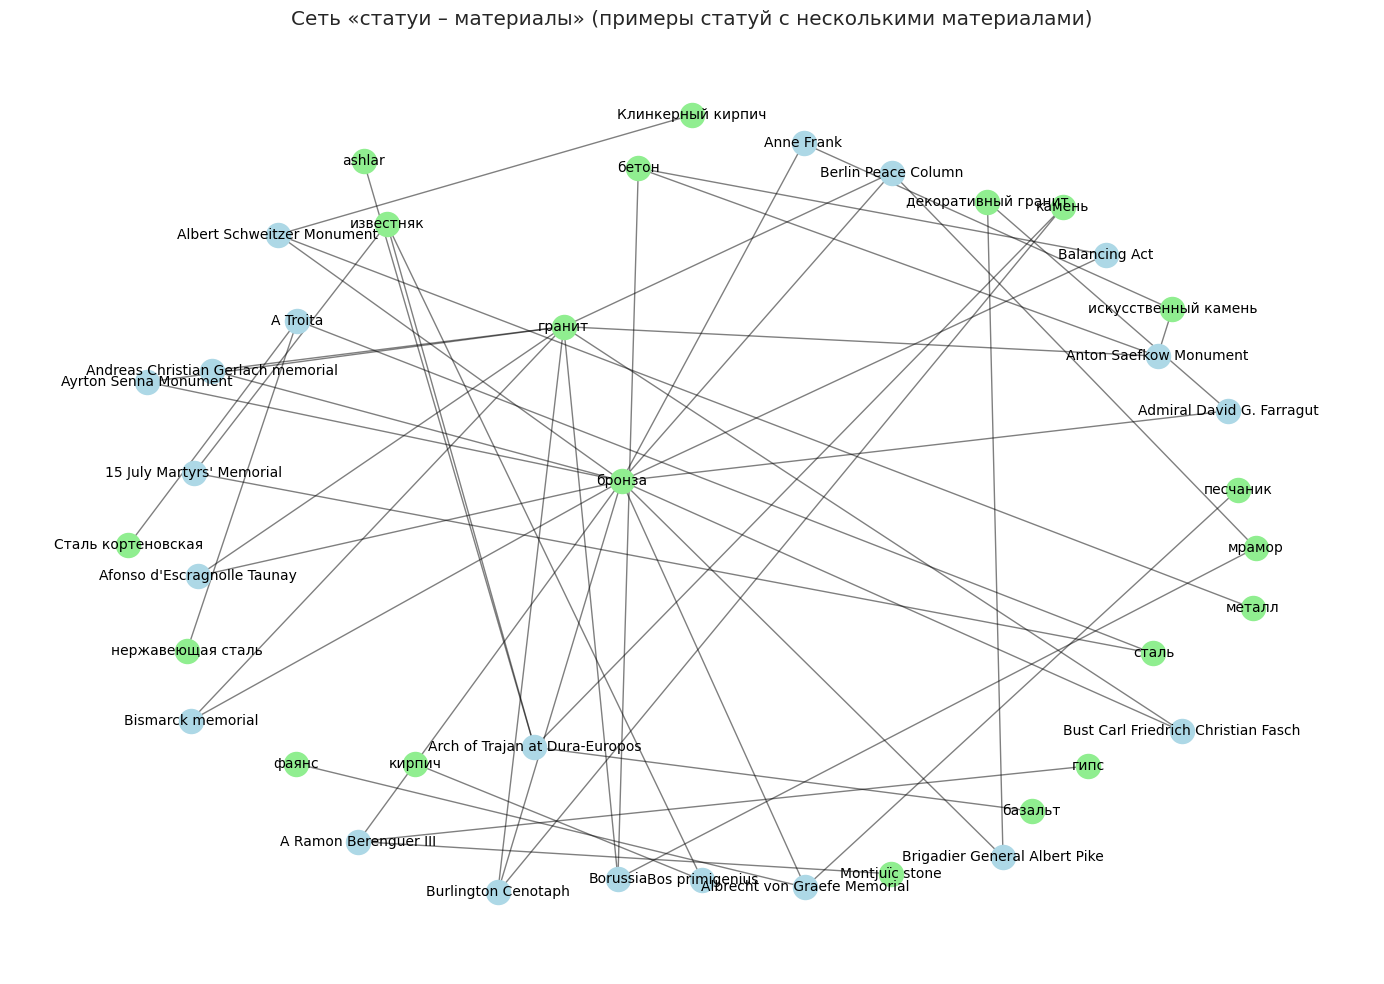

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Выбираем статуи, которые имеют более одного материала (интересные случаи)
dup = df_clean.groupby('statue')['material'].nunique()
multi_statues = dup[dup > 1].index[:20]  # ограничим 20 для читаемости

df_sub = df_clean[df_clean['statue'].isin(multi_statues)]

# Строим граф
G = nx.Graph()
for _, row in df_sub.iterrows():
    G.add_node(row['statue'], type='statue')
    G.add_node(row['material'], type='material')
    G.add_edge(row['statue'], row['material'])

# Позиционирование узлов
pos = nx.spring_layout(G, k=2, iterations=50)

# Рисуем
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue',
                       nodelist=[n for n, attr in G.nodes(data=True) if attr['type'] == 'statue'])
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen',
                       nodelist=[n for n, attr in G.nodes(data=True) if attr['type'] == 'material'])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Сеть «статуи – материалы» (примеры статуй с несколькими материалами)')
plt.axis('off')
plt.tight_layout()
plt.show()

Идея : 1 Цвет будет группироваться по странам Идея : 2 На карте Земли точками обозначены статуи и от них идут линии к материалам, а материалы и вершины распоженные где угодно на планете

#7. Интерактивная карта (Choropleth) – плотность статуй по странам

In [11]:
import plotly.express as px
import pandas as pd

# Проверяем исходные данные
print("🔍 Уникальные страны в данных (первые 20):")
print(df_clean['country'].unique()[:20])
print("\n📊 Топ-10 стран по количеству статуй:")
print(df_clean['country'].value_counts().head(10))

# Словарь для перевода русских названий в английские
country_translation = {
    'Германия': 'Germany',
    'Бразилия': 'Brazil',
    'Сирия': 'Syria',
    'Россия': 'Russia',
    'Испания': 'Spain',
    'США': 'United States',
    'Польша': 'Poland',
    'Армения': 'Armenia',
    'Украина': 'Ukraine',
    'Чехия': 'Czech Republic',
    'Италия': 'Italy',
    'Франция': 'France',
    'Нидерланды': 'Netherlands',
    'Колумбия': 'Colombia',
    'СССР': 'Russia',          # заменим на Россию (или можно 'Soviet Union', но карта не поймёт)
    'Канада': 'Canada',
    'Индия': 'India',
    'Китай': 'China',
    'Япония': 'Japan',
    'Мексика': 'Mexico',
    'Австрия': 'Austria',
    'Бельгия': 'Belgium',
    'Великобритания': 'United Kingdom',
    'Греция': 'Greece',
    'Дания': 'Denmark',
    'Израиль': 'Israel',
    'Ирландия': 'Ireland',
    'Норвегия': 'Norway',
    'Португалия': 'Portugal',
    'Турция': 'Turkey',
    'Финляндия': 'Finland',
    'Швейцария': 'Switzerland',
    'Швеция': 'Sweden',
    'ЮАР': 'South Africa',
    'Египет': 'Egypt',
    'Австралия': 'Australia',
    'Аргентина': 'Argentina',
    'Венесуэла': 'Venezuela',
    'Вьетнам': 'Vietnam',
    'Индонезия': 'Indonesia',
    'Иран': 'Iran',
    'Казахстан': 'Kazakhstan',
    'Куба': 'Cuba',
    'Латвия': 'Latvia',
    'Литва': 'Lithuania',
    'Марокко': 'Morocco',
    'Перу': 'Peru',
    'Румыния': 'Romania',
    'Сербия': 'Serbia',
    'Словакия': 'Slovakia',
    'Словения': 'Slovenia',
    'Таиланд': 'Thailand',
    'Тунис': 'Tunisia',
    'Узбекистан': 'Uzbekistan',
    'Хорватия': 'Croatia',
    'Чили': 'Chile',
    'Эстония': 'Estonia',
    'Южная Корея': 'South Korea',
    # Добавьте другие страны при необходимости
}

# Переводим названия
df_clean['country_en'] = df_clean['country'].map(country_translation)

# Удаляем строки, где перевод не удался (если такие есть)
df_clean = df_clean.dropna(subset=['country_en'])

# Подсчитываем количество статуй по переведённым названиям
country_counts = df_clean['country_en'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

print("\n✅ Топ-10 после перевода:")
print(country_counts.head(10))

# Строим карту
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale='Viridis',
    title='Количество статуй по странам мира (после перевода названий)'
)

fig.update_layout(width=1000, height=600)
fig.show()

🔍 Уникальные страны в данных (первые 20):
['Германия' 'Бразилия' 'Колумбия' 'Россия' 'Польша' 'СССР' 'Аргентина'
 'США' 'Боливия' 'Ирландия' 'Италия' 'Китайская Республика (Тайвань)'
 'Сербия' 'Испания' 'Украина' 'Грузия' 'Словения' 'КНДР' 'Азербайджан'
 'Реюньон']

📊 Топ-10 стран по количеству статуй:
country
Германия    442
Бразилия    161
Сирия       144
Россия      139
Испания      87
США          69
Польша       66
Армения      63
Украина      34
Италия       28
Name: count, dtype: int64

✅ Топ-10 после перевода:
         country  count
0        Germany    442
1         Brazil    161
2         Russia    160
3          Syria    144
4          Spain     87
5  United States     69
6         Poland     66
7        Armenia     63
8        Ukraine     34
9          Italy     28
